Hailey's Work

In [2]:
# Time to install/import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from scipy.interpolate import interp1d
import pandas as pd
import scipy.stats as st


# Testing it
example_equ = np.cos(np.pi)
print(example_equ)

-1.0


In [3]:
# Try using interpolate with penguins
penguins_df = sns.load_dataset('penguins')

penguins_df.info()
# Make a subset of Chinstrap
chinstrap = penguins_df.loc[penguins_df['species'] == 'Chinstrap']
chinstrap.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,Female
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,Male
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,Male
155,Chinstrap,Dream,45.4,18.7,188.0,3525.0,Female
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,Male


(3733.0882352941176, 381.4986213564681)


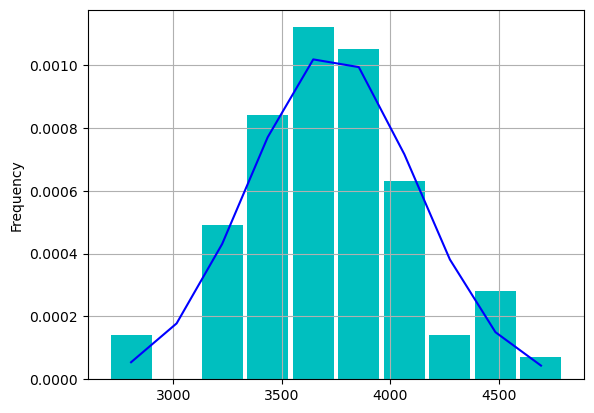

In [46]:
# Find standard deviation and mean
import chunk
fig1 = plt.figure()

# Make a histogram of body_mass_g for Chinstrap penguins
chinstrap_hist = chinstrap['body_mass_g'].plot.hist(grid=True, bins=10, rwidth=0.9, color='c', density=True)

# Now we can find the distribution curve for this variable
# First define the distribution type
distribution = st.norm
params = distribution.fit(chinstrap['body_mass_g'], loc=0)

# These parameters are the mean and standard deviation, in that order
print(params)

arg = params[:-2]
loc = params[-2]
scale = params[-1]

y, x = np.histogram(chinstrap['body_mass_g']) 

x = (x + np.roll(x, -1))[:-1] / 2.0

pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
plt.plot(x,pdf,'b-')


In [41]:
# Now we can find the distribution curve for this variable
# First define the distribution type
distribution = st.norm
params = distribution.fit(chinstrap['body_mass_g'], loc=0)

print(params)

arg = params[:-2]
loc = params[-2]
scale = params[-1]


(3733.0882352941176, 381.4986213564681)


In [ ]:
stand_dev = np.std(chinstrap['body_mass_g'], ddof=1)
mean = np.mean(chinstrap['body_mass_g'])
print(stand_dev, mean)

# Normalizing data
data = chinstrap['body_mass_g']
# 1: center at zero (make the mean zero)
data = data - mean
# check
print(np.mean(data))
# 2: normlize std (make the std of the data 1)
data = data / stand_dev
# check
print(np.std(data))
